In [1]:
%%cmd
pip install pandas matplotlib numpy seaborn category-encoders

Microsoft Windows [Version 10.0.22631.3447]
(c) Microsoft Corporation. All rights reserved.

(base) C:\Users\User\Machine Learning Codes>pip install pandas matplotlib numpy seaborn category-encoders

(base) C:\Users\User\Machine Learning Codes>

In [33]:
# import warnings filter
from warnings import simplefilter

# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

<h1>1. Import Libraries and Read Data</h1>

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('cwdata.csv')

<h1>2. Exploratory data analysis (EDA) and Pre-proccesing</h1>

In [35]:
df.head()

,Income,Area,Employed,Home Owner,Make,Model,Gender,Age,Colour,Stolen
0,12500,Urban,NaN,N,Toyota,Auris,F,25,Yellow,N
1,76300,R,Y,Y,BMW,3 series,Male,25,Black,Yes
2,52340,Rural,N,Yes,Mercedes,C Class,F,25,Grey,1
3,150600,Rural,Y,Y,BMW,3 series,F,19,White,Y
4,50000,Rural,Yes,1,Volkswagon,Golf,Male,55,Black,Yes


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Income      120 non-null    int64 
 1   Area        120 non-null    object
 2   Employed    118 non-null    object
 3   Home Owner  120 non-null    object
 4   Make        120 non-null    object
 5   Model       119 non-null    object
 6   Gender      120 non-null    object
 7   Age         120 non-null    object
 8   Colour      120 non-null    object
 9   Stolen      120 non-null    object
dtypes: int64(1), object(9)
memory usage: 9.5+ KB


In [37]:
#remove rows with null values
print("Before\n", df.isnull().sum())

df['Home Owner'] = df['Home Owner'].str.strip()
df['Age'] = df['Age'].str.strip()
df.replace('', np.nan, inplace=True)
df = df.dropna()

print("\nAfter\n" ,df.isnull().sum())


Before
 Income        0
Area          0
Employed      2
Home Owner    0
Make          0
Model         1
Gender        0
Age           0
Colour        0
Stolen        0
dtype: int64

After
 Income        0
Area          0
Employed      0
Home Owner    0
Make          0
Model         0
Gender        0
Age           0
Colour        0
Stolen        0
dtype: int64


In [38]:
# remove duplicates
duplicate_row_count = df.duplicated(keep=False).sum()
print("Before: No of duplicates: ", duplicate_row_count)

df = df.drop_duplicates()

duplicate_row_count = df.duplicated(keep=False).sum()
print("After: No of duplicates: ", duplicate_row_count)

Before: No of duplicates:  4
After: No of duplicates:  0


In [39]:
# pre-process Area column
unique_values = df['Area'].unique()
print("Before: ",unique_values)

df['Area'] = df['Area'].replace(['R', 'Rurak', 'r'], 'Rural')
df['Area'] = df['Area'].replace(['U', 'U ', 'u'], 'Urban')

unique_values = df['Area'].unique()
print("After: ",unique_values)

Before:  ['R' 'Rural' 'U ' 'U' 'u' 'Urban' 'r' 'Rurak']
After:  ['Rural' 'Urban']


In [40]:
# pre-process Employed column
unique_values = df['Employed'].unique()
print("Before: ",unique_values)

df['Employed'] = df['Employed'].replace(['Y', 'Yes', 'y'], '1')
df['Employed'] = df['Employed'].replace(['N', 'No'], '0')

unique_values = df['Employed'].unique()
print("Employed: ",unique_values)

Before:  ['Y' 'N' 'Yes' 'No' '1' '0' 'y']
Employed:  ['1' '0']


In [41]:
# pre-process Home Owner column
unique_values = df['Home Owner'].unique()
print("Before: ",unique_values)

df['Home Owner'] = df['Home Owner'].replace(['Y', 'Yes', 'y'], '1')
df['Home Owner'] = df['Home Owner'].replace(['N', 'No', 'n'], '0')

unique_values = df['Home Owner'].unique()
print("Home Owner: ",unique_values)


Before:  ['Y' 'Yes' '1' 'No' 'N' 'n' 'y']
Home Owner:  ['1' '0']


In [42]:
# pre-process Gender column
unique_values = df['Gender'].unique()
print("Before: ",unique_values)

df['Gender'] = df['Gender'].replace(['Female'], 'F')
df['Gender'] = df['Gender'].replace(['Male'], 'M')

unique_values = df['Gender'].unique()
print("Gender: ",unique_values)


Before:  ['Male' 'F' 'Female' 'M' 'PNS']
Gender:  ['M' 'F' 'PNS']


In [43]:
# pre-process Stolen column
unique_values = df['Stolen'].unique()
print("Before: ",unique_values)

df['Stolen'] = df['Stolen'].replace(['Y', 'Yes', 'y'], '1')
df['Stolen'] = df['Stolen'].replace(['N', 'No', 'n'], '0')

unique_values = df['Stolen'].unique()
print("Stolen: ",unique_values)


Before:  ['Yes' '1' 'Y' 'N' 'No' '0' 'n']
Stolen:  ['1' '0']


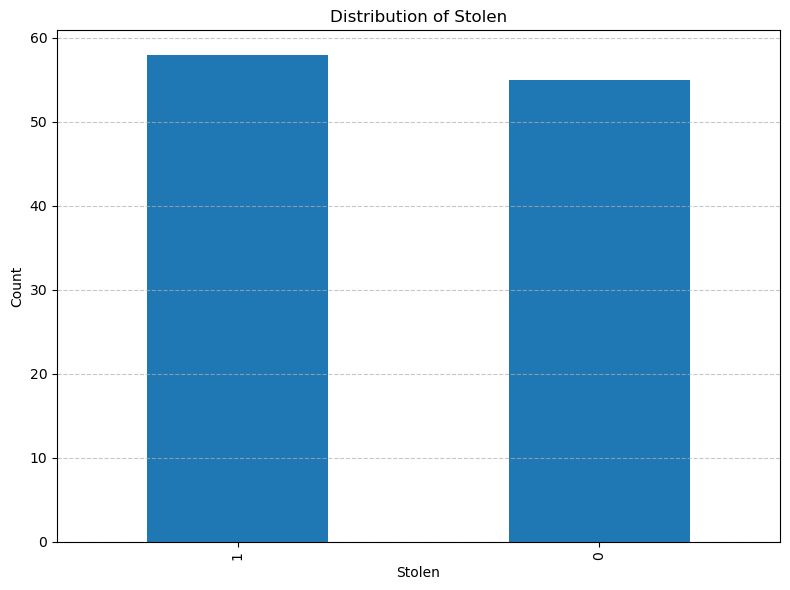

In [44]:
#visualize distribution of Stolen
count_df = df['Stolen'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
count_df.plot(kind='bar')
plt.title('Distribution of Stolen')
plt.xlabel('Stolen')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<h2>Encode data</h2>

<h3>Target Encoding for Make, Model, Colour</h3>

In [45]:
df['Stolen'] = df['Stolen'].astype(int)

In [46]:
import category_encoders as ce

#target encoding for Make
encoder = ce.TargetEncoder(cols="Make")
encode = encoder.fit_transform(df["Make"], df['Stolen'])
df['Make_encoded'] = encode

#target encoding for Model
encoder = ce.TargetEncoder(cols="Model")
encode = encoder.fit_transform(df["Model"], df['Stolen'])
df['Model_encoded'] = encode

#target encoding for Colour
encoder = ce.TargetEncoder(cols="Colour")
encode = encoder.fit_transform(df["Colour"], df['Stolen'])
df['Colour_encoded'] = encode


<h3>One-Hot Encoding for Area, Gender</h3>

In [47]:
df = pd.get_dummies(df, columns = ['Area', 'Gender'])
df

,Income,Employed,Home Owner,Make,Model,Age,Colour,Stolen,Make_encoded,Model_encoded,Colour_encoded,Area_Rural,Area_Urban,Gender_F,Gender_M,Gender_PNS
1,76300,1,1,BMW,3 series,25,Black,1,0.724335,0.671864,0.636426,1,0,0,1,0
2,52340,0,1,Mercedes,C Class,25,Grey,1,0.781637,0.839302,0.730908,1,0,1,0,0
3,150600,1,1,BMW,3 series,19,White,1,0.724335,0.671864,0.605945,1,0,1,0,0
4,50000,1,1,Volkswagon,Golf,55,Black,1,0.469049,0.511391,0.636426,1,0,0,1,0
5,15000,1,1,Peugeot,107,54,Yellow,0,0.375234,0.403349,0.411740,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,41230,0,1,Mercedes,C Class,37,White,1,0.781637,0.839302,0.605945,1,0,0,1,0
116,54560,0,1,BMW,2 Series,32,Yellow,0,0.724335,0.433991,0.411740,1,0,1,0,0
117,46540,0,1,Fiat,Punto,32,Red,0,0.433991,0.433991,0.294847,1,0,0,1,0
118,5450,1,1,Volkswagon,Polo,54,Black,0,0.469049,0.440466,0.636426,1,0,1,0,0


In [48]:
df['Employed'] = df['Employed'].astype(int)
df['Home Owner'] = df['Home Owner'].astype(int)
df["Age"] = df['Age'].astype(int)

df.drop(['Make', 'Model', 'Colour'], axis=1, inplace=True)
df.dtypes

Income              int64
Employed            int32
Home Owner          int32
Age                 int32
Stolen              int32
Make_encoded      float64
Model_encoded     float64
Colour_encoded    float64
Area_Rural          uint8
Area_Urban          uint8
Gender_F            uint8
Gender_M            uint8
Gender_PNS          uint8
dtype: object

<h3>Denoise/Outliers remover</h3>

In [49]:
#Scaling Income, Age, Make_encoded, Model_encoded, Colour_encoded Values
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

X = df[['Income', 'Age']]

Scaled_Income = scale.fit_transform(X)

df[['Income', 'Age']] = Scaled_Income
print(Scaled_Income)

[[ 1.16395624 -0.85420344]
 [ 0.28522803 -0.85420344]
 [ 3.88889389 -1.39144827]
 [ 0.199409    1.83202073]
 [-1.084209    1.74247992]
 [-1.39411106  0.66799026]
 [ 1.13204917 -0.2274178 ]
 [ 0.35894438  2.72742879]
 [-0.08922167 -0.58558102]
 [-1.18176397 -0.49604022]
 [ 0.68443323  0.57844945]
 [-0.32870812 -0.04833619]
 [-0.0481459   0.66799026]
 [-0.21868372  0.93661267]
 [ 0.016035    1.83202073]
 [-1.18323096 -1.03328505]
 [-0.17247347  0.75753106]
 [ 0.0343724  -0.13787699]
 [-0.2681947   1.56339831]
 [ 0.39121821 -1.03328505]
 [ 0.12532591 -0.76466263]
 [-0.36684991 -0.2274178 ]
 [-0.04869602 -0.04833619]
 [ 0.28559478 -0.2274178 ]
 [-0.03677671 -0.67512183]
 [-0.2406886  -1.21236666]
 [ 0.36664609 -0.2274178 ]
 [ 0.07251419  1.74247992]
 [-1.43445334 -1.21236666]
 [ 1.8681124   0.22028623]
 [ 0.11322322  0.93661267]
 [-1.18158059 -1.03328505]
 [ 0.3461082  -0.2274178 ]
 [-0.66153193  1.65293912]
 [ 1.38400504 -0.2274178 ]
 [-0.0939894  -0.94374424]
 [ 1.1254477  -1.21236666]
 

<h1>3. Model Training</h1>

In [50]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

X = df.drop(columns=['Stolen']) 
y = df['Stolen']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def train_and_evaluate(algo_name, algo, X_train, y_train, X_test, y_test):
    #model = LogisticRegression()
    model = algo
    model.fit(X_train, y_train)
    # Evaluate the model
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy of {algo_name}: {accuracy}")
    return model, accuracy

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "KNeighbors Classifier": KNeighborsClassifier(),
    "SVC": SVC(),
    "GaussianNB": GaussianNB()
}

accuracies = {}
for algo_name, algo in models.items():
    _, accuracy = train_and_evaluate(algo_name, algo, X_train, y_train, X_test, y_test)
    accuracies[algo_name] = accuracy


Accuracy of Logistic Regression: 0.9565217391304348
Accuracy of Decision Tree Classifier: 1.0
Accuracy of Random Forest Classifier: 1.0
Accuracy of KNeighbors Classifier: 0.8260869565217391
Accuracy of SVC: 0.9565217391304348
Accuracy of GaussianNB: 0.8260869565217391


In [51]:
# Perform cross-validation for each model
num_folds = 5
cross_val_scores = {}
for algo_name, algo in models.items():
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
    cross_val_results = cross_val_score(algo, X_train, y_train, cv=kf)
    cross_val_scores[algo_name] = cross_val_results
    print(f"Cross-validation scores for {algo_name}: {cross_val_results}")
    print(f"Mean cross-validation score for {algo_name}: {cross_val_results.mean()}")
    print(f"------------------------------------------------------------------------")

# Optionally, you can store the results in a DataFrame for better presentation
cross_val_df = pd.DataFrame(cross_val_scores)
print("\nCross-validation results:")
print(cross_val_df)

Cross-validation scores for Logistic Regression: [0.77777778 0.77777778 0.88888889 0.88888889 0.94444444]
Mean cross-validation score for Logistic Regression: 0.8555555555555555
------------------------------------------------------------------------
Cross-validation scores for Decision Tree Classifier: [0.88888889 0.94444444 1.         0.94444444 1.        ]
Mean cross-validation score for Decision Tree Classifier: 0.9555555555555555
------------------------------------------------------------------------
Cross-validation scores for Random Forest Classifier: [0.88888889 0.94444444 1.         0.94444444 1.        ]
Mean cross-validation score for Random Forest Classifier: 0.9555555555555555
------------------------------------------------------------------------
Cross-validation scores for KNeighbors Classifier: [0.61111111 0.72222222 0.83333333 0.77777778 0.83333333]
Mean cross-validation score for KNeighbors Classifier: 0.7555555555555556
---------------------------------------------

>1, train: 0.944, test: 1.000
>2, train: 0.978, test: 0.957
>3, train: 0.978, test: 0.957
>4, train: 1.000, test: 1.000
>5, train: 1.000, test: 1.000
>6, train: 1.000, test: 1.000
>7, train: 1.000, test: 1.000
>8, train: 1.000, test: 1.000
>9, train: 1.000, test: 1.000
>10, train: 1.000, test: 1.000
>11, train: 1.000, test: 1.000
>12, train: 1.000, test: 1.000
>13, train: 1.000, test: 1.000
>14, train: 1.000, test: 1.000
>15, train: 1.000, test: 1.000
>16, train: 1.000, test: 1.000
>17, train: 1.000, test: 1.000
>18, train: 1.000, test: 1.000
>19, train: 1.000, test: 1.000
>20, train: 1.000, test: 1.000


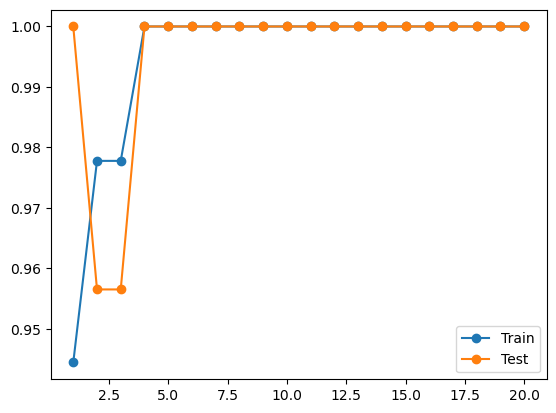

In [52]:
from sklearn.model_selection import learning_curve
from matplotlib import pyplot

train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = DecisionTreeClassifier(max_depth=i)
	# fit model on the training dataset
	model.fit(X_train, y_train)
	# evaluate on the train dataset
	train_yhat = model.predict(X_train)
	train_acc = accuracy_score(y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(X_test)
	test_acc = accuracy_score(y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()


In [53]:
from sklearn.calibration import CalibratedClassifierCV

# Train and evaluate function remains the same

# Initialize the Decision Tree classifier
tree_clf = DecisionTreeClassifier()

# Fit the Decision Tree classifier to the training data
tree_clf.fit(X_train, y_train)

# Calibrate the classifier
calibrated_clf = CalibratedClassifierCV(tree_clf, method='sigmoid', cv='prefit')
calibrated_clf.fit(X_train, y_train)

# Calculate predicted probabilities
y_pred_proba = calibrated_clf.predict_proba(X_test)



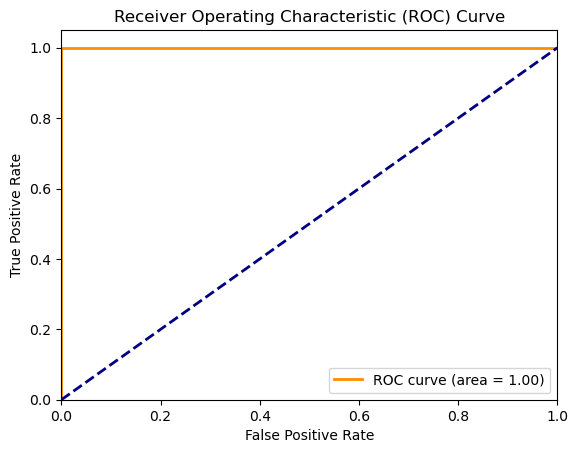

In [54]:
from sklearn.metrics import roc_curve, auc

# Calculate fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


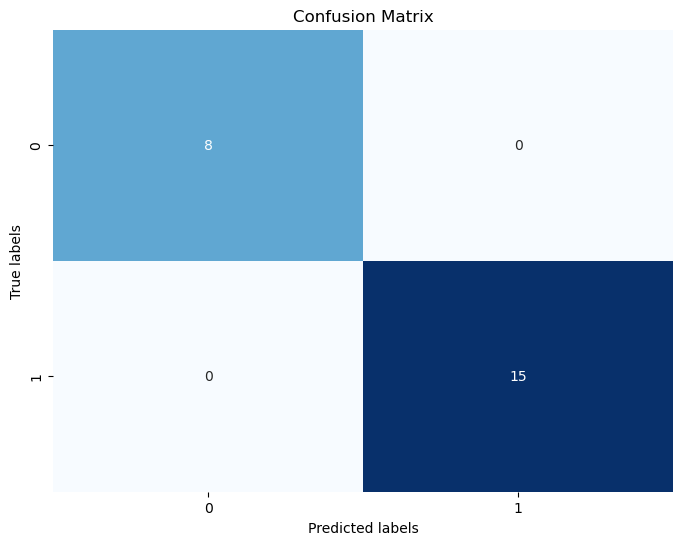

In [55]:
from sklearn.metrics import confusion_matrix

# Threshold prediction probabilities to obtain binary predictions
threshold = 0.5  # You can adjust this threshold
y_pred_binary = (y_pred_proba[:, 1] > threshold).astype(int)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


>1, train: 0.989, test: 0.957
>2, train: 0.933, test: 0.739
>3, train: 0.989, test: 1.000
>4, train: 0.989, test: 0.957
>5, train: 1.000, test: 0.957
>6, train: 0.989, test: 0.957
>7, train: 0.989, test: 1.000
>8, train: 1.000, test: 1.000
>9, train: 1.000, test: 1.000
>10, train: 1.000, test: 1.000
>11, train: 1.000, test: 1.000
>12, train: 1.000, test: 1.000
>13, train: 1.000, test: 1.000
>14, train: 1.000, test: 1.000
>15, train: 1.000, test: 1.000
>16, train: 1.000, test: 1.000
>17, train: 1.000, test: 1.000
>18, train: 0.989, test: 1.000
>19, train: 1.000, test: 1.000
>20, train: 1.000, test: 1.000


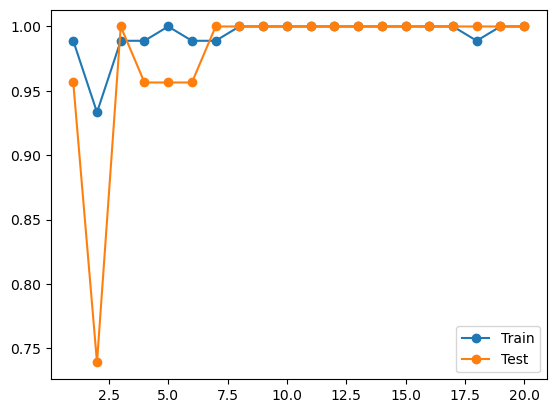

In [56]:
train_scores, test_scores = list(), list()
# define the n_estimators to evaluate
values = [i for i in range(1, 21)]
# evaluate a RandomForestClassifier for each n_estimators
for i in values:
	# configure the model
	model = RandomForestClassifier(n_estimators=i)
	# fit model on the training dataset
	model.fit(X_train, y_train)
	# evaluate on the train dataset
	train_yhat = model.predict(X_train)
	train_acc = accuracy_score(y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(X_test)
	test_acc = accuracy_score(y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

In [57]:
# Train and evaluate function remains the same

# Initialize the Random Forest Classifier
forest_clf = RandomForestClassifier()

# Fit the Random Forest Classifier to the training data
forest_clf.fit(X_train, y_train)

# Calibrate the classifier
calibrated_clf = CalibratedClassifierCV(forest_clf, method='sigmoid', cv='prefit')
calibrated_clf.fit(X_train, y_train)

# Calculate predicted probabilities
y_pred_proba = calibrated_clf.predict_proba(X_test)

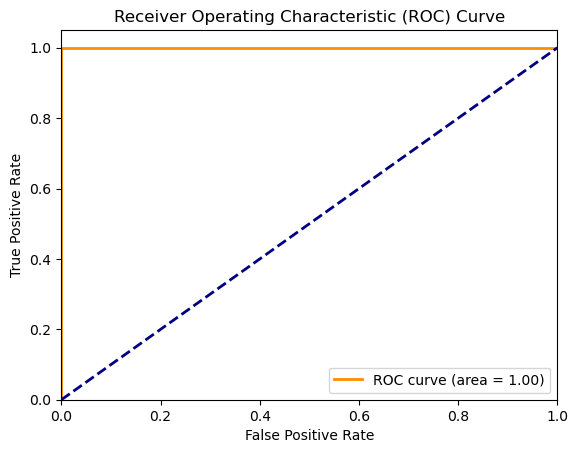

In [58]:
# Calculate fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

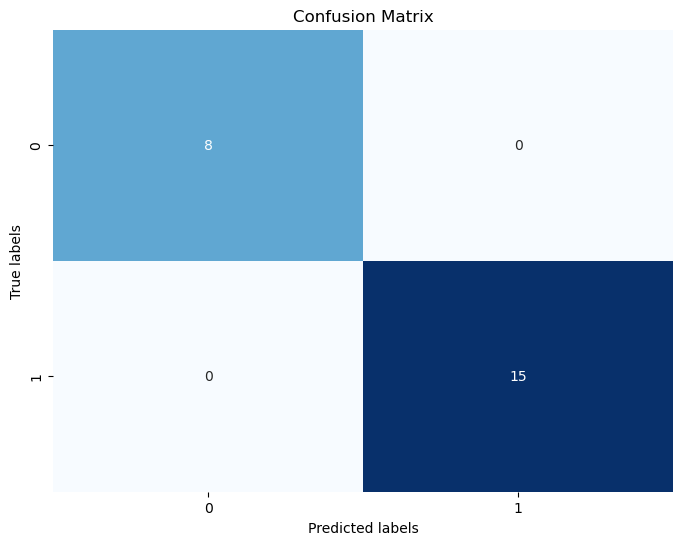

In [59]:
# Threshold prediction probabilities to obtain binary predictions
threshold = 0.5  # You can adjust this threshold
y_pred_binary = (y_pred_proba[:, 1] > threshold).astype(int)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

>1, train: 1.000, test: 1.000
>2, train: 0.956, test: 0.870
>3, train: 0.922, test: 0.913
>4, train: 0.900, test: 0.826
>5, train: 0.889, test: 0.826
>6, train: 0.900, test: 0.826
>7, train: 0.833, test: 0.826
>8, train: 0.844, test: 0.826
>9, train: 0.789, test: 0.870
>10, train: 0.756, test: 0.826
>11, train: 0.789, test: 0.826
>12, train: 0.800, test: 0.913
>13, train: 0.789, test: 0.826
>14, train: 0.800, test: 0.870
>15, train: 0.800, test: 0.826
>16, train: 0.822, test: 0.826
>17, train: 0.811, test: 0.826
>18, train: 0.844, test: 0.870
>19, train: 0.833, test: 0.870
>20, train: 0.833, test: 0.826


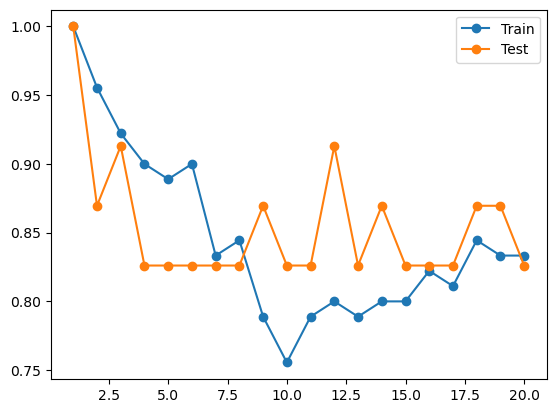

In [60]:
train_scores, test_scores = list(), list()
# define the n_neighbors to evaluate
values = [i for i in range(1, 21)]
# evaluate a KNeighborsClassifier for each n_neighbors
for i in values:
	# configure the model
	model = KNeighborsClassifier(n_neighbors=i)
	# fit model on the training dataset
	model.fit(X_train, y_train)
	# evaluate on the train dataset
	train_yhat = model.predict(X_train)
	train_acc = accuracy_score(y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(X_test)
	test_acc = accuracy_score(y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

In [61]:
# Train and evaluate function remains the same

# Initialize the KNeighbors Classifier
neighbors_clf = KNeighborsClassifier()

# Fit the KNeighbors Classifier to the training data
neighbors_clf.fit(X_train, y_train)

# Calibrate the classifier
calibrated_clf = CalibratedClassifierCV(neighbors_clf, method='sigmoid', cv='prefit')
calibrated_clf.fit(X_train, y_train)

# Calculate predicted probabilities
y_pred_proba = calibrated_clf.predict_proba(X_test)


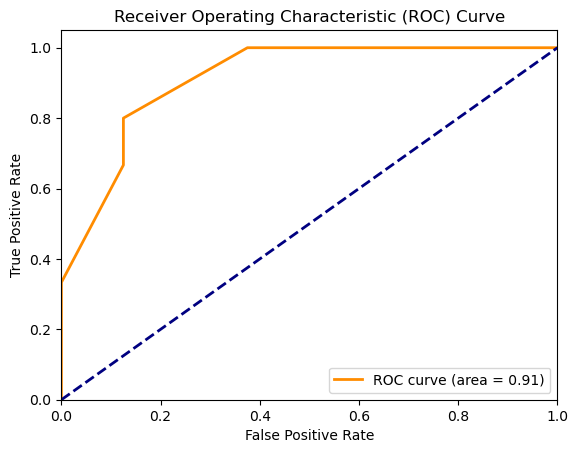

In [62]:
# Calculate fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

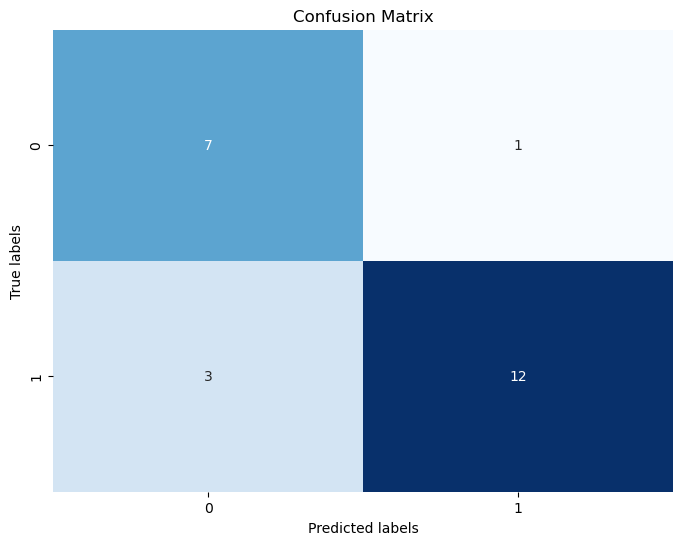

In [63]:
# Threshold prediction probabilities to obtain binary predictions
threshold = 0.5  # You can adjust this threshold
y_pred_binary = (y_pred_proba[:, 1] > threshold).astype(int)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()